In [ ]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
data_all =  pd.read_csv("/data_all.csv")
data_first_third = pd.read_csv("/data_first_third.csv")
data_second=pd.read_csv("/data1_cleaned.csv")

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

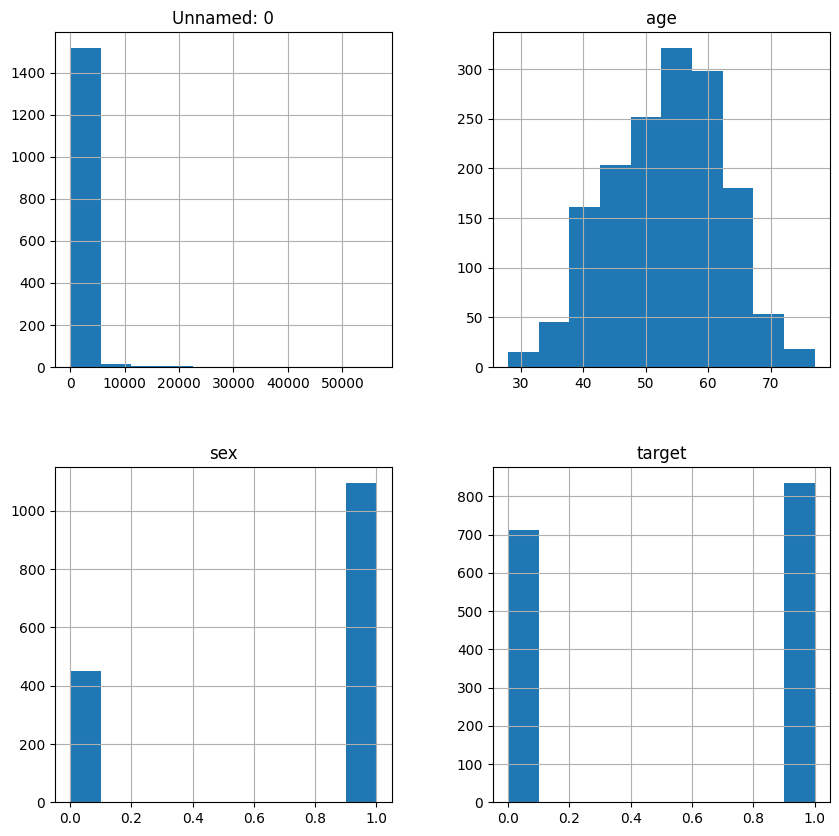

In [ ]:
data_all.hist(figsize=(10,10))

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>],
       [<Axes: title={'center': 'resting_bp_s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'restingecg'}>],
       [<Axes: title={'center': 'max_heart_rate'}>,
        <Axes: title={'center': 'exercise_angina'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST_slope'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

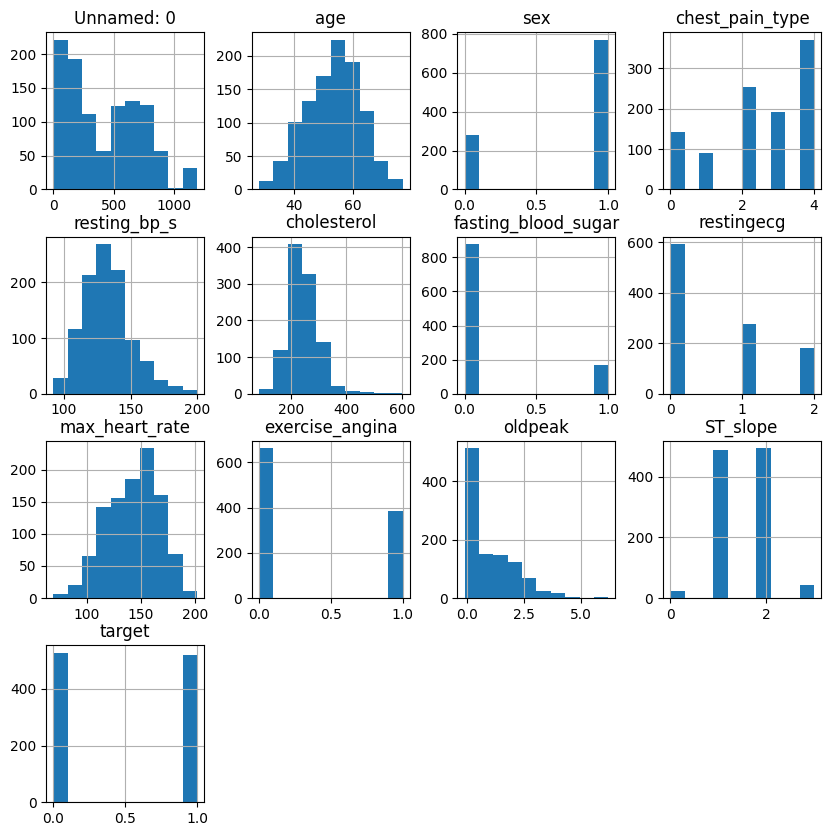

In [ ]:
data_first_third.hist(figsize=(10,10))

'chest_pain_type', 'restingecg' and 'ST_slope' require nominal encoding (onehot). Also 'chest_pain_type' and 'ST_slope' should have no 0 values (not a valid category), so those should be dropped.

In [ ]:
data_first_third.size()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

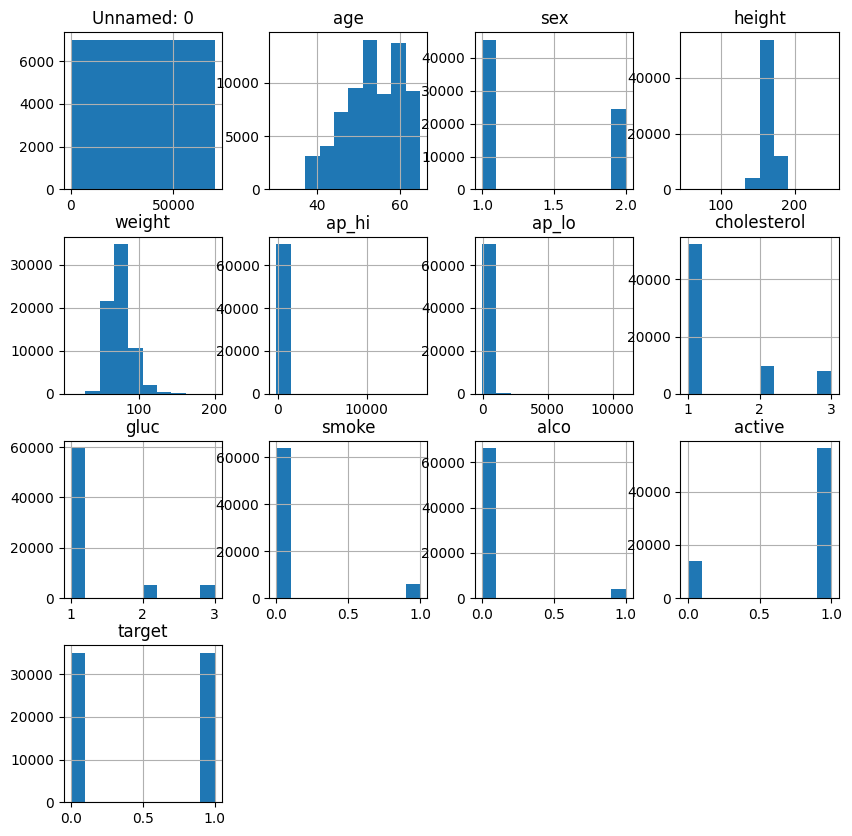

In [ ]:
data_second.hist(figsize=(10,10))

'cholesterol' and 'glucose' have ordinal encoding (from data description)

 Preprocessing transformers

In [ ]:
numtf_linear = Pipeline([
                         ('scaler', StandardScaler())
                         ])

numtf_non_linear = Pipeline([
                         ('scaler', RobustScaler()),
                         ('non-line transform', PowerTransformer())
                         ])

cattf = Pipeline([
                         ('one-hot', OneHotEncoder(handle_unknown='ignore'))
                         ])

# All Three Datasets Combined

In [ ]:
preproc_all = ColumnTransformer([
    ('numeric', numtf_linear, ['age'])
], remainder='passthrough')

pipe_all = Pipeline ([
    ('preproc', preproc_all),
    ('rf_classifier', RandomForestClassifier())
])

In [ ]:
train_all, test_all = train_test_split(data_all, test_size=0.25, random_state=44)

In [ ]:
X_train_all = train_all[['age', 'sex']]
y_train_all = train_all[['target']]

X_test_all = test_all[['age', 'sex']]
y_test_all = test_all[['target']]

In [ ]:
param_grid_rf={'rf_classifier__n_estimators' : [25, 50, 100, 200],
                     'rf_classifier__max_features' : [1.0, 'sqrt']
                     }

In [ ]:
grid_cv_all = GridSearchCV(
    estimator=pipe_all,
    param_grid=param_grid_rf,
    scoring = 'accuracy',
    cv = 5)
grid_cv_all.fit(X_train_all, y_train_all.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age'])])),
                                       ('rf_classifier',
                                        RandomForestClassifier())]),
             param_grid={'rf_classifier__max_features': [1.0, 'sqrt'],
                         'rf_classifier__n_estimators': [25, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
pd.DataFrame(grid_cv_all.cv_results_)[['param_rf_classifier__max_features', 'param_rf_classifier__n_estimators', 'mean_test_score', 'std_test_score',
                                     'rank_test_score']].sort_values('rank_test_score')

,param_rf_classifier__max_features,param_rf_classifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,1.0,25,0.534953,0.010276,1
3,1.0,200,0.529784,0.020369,2
2,1.0,100,0.527198,0.019499,3
6,sqrt,100,0.525470,0.012436,4
7,sqrt,200,0.524608,0.016155,5
1,1.0,50,0.523739,0.016153,6
5,sqrt,50,0.522891,0.019901,7
4,sqrt,25,0.521152,0.019513,8


In [ ]:
print(f'For train set, best score (acc) is: {grid_cv_all.best_score_}, with best parameters being: {grid_cv_all.best_params_}')

For test set, best score (acc) is: 0.5349529780564264, with best parameters being: {'rf_classifier__max_features': 1.0, 'rf_classifier__n_estimators': 25}


# First and Third Datasets Combined

In [ ]:
preproc_13 = ColumnTransformer([
    ('numeric_linear', numtf_linear, ['age', 'max_heart_rate']),
    ('numeric_non_linear', numtf_non_linear, ['oldpeak', 'resting_bp_s', 'cholesterol']),
    ('categoric', cattf, ['chest_pain_type', 'restingecg', 'ST_slope'])
], remainder='passthrough')

pipe_13 = Pipeline ([
    ('preproc', preproc_13),
    ('rf_classifier', RandomForestClassifier())
])

In [ ]:
data_first_third=data_first_third[(data_first_third['chest_pain_type']!=0) & (data_first_third['ST_slope']!=0)]

In [ ]:
train_first_third, test_first_third = train_test_split(data_first_third, test_size=0.25, random_state=44)

In [ ]:
train_first_third.head()

,Unnamed: 0,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,restingecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
786,658,62,0,4,124,209,0,0,163,0,0.0,1,0
344,42,35,1,2,150,264,0,0,168,0,0.0,1,0
756,628,53,1,4,142,226,0,2,111,1,0.0,1,0
117,143,34,1,3,118,182,0,0,174,0,0.0,2,1
355,53,41,0,2,130,245,0,0,150,0,0.0,1,0


In [ ]:
X_train_13 = train_first_third.iloc[:, 1:-1]
y_train_13 = train_first_third[['target']]

X_test_13 = test_first_third.iloc[:, 1:-1]
y_test_13 = test_first_third[['target']]

In [ ]:
grid_cv_13 = GridSearchCV(
    estimator=pipe_13,
    param_grid=param_grid_rf,
    scoring = 'accuracy',
    cv = 5)
grid_cv_13.fit(X_train_13, y_train_13.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_linear',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'max_heart_rate']),
                                                                        ('numeric_non_linear',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler()),
                                                                                         ('non-line '
                                                                                          'transform',
                                                                                          PowerTransformer())]),
                                                                         ['oldpeak',
                                                                          'resting_bp_s',
                                                                          'cholesterol']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('one-hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['chest_pain_type',
                                                                          'restingecg',
                                                                          'ST_slope'])])),
                                       ('rf_classifier',
                                        RandomForestClassifier())]),
             param_grid={'rf_classifier__max_features': [1.0, 'sqrt'],
                         'rf_classifier__n_estimators': [25, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
pd.DataFrame(grid_cv_13.cv_results_)[['param_rf_classifier__max_features', 'param_rf_classifier__n_estimators', 'mean_test_score', 'std_test_score',
                                     'rank_test_score']].sort_values('rank_test_score')

,param_rf_classifier__max_features,param_rf_classifier__n_estimators,mean_test_score,std_test_score,rank_test_score
5,sqrt,50,0.825373,0.014624,1
7,sqrt,200,0.825373,0.026948,1
4,sqrt,25,0.822388,0.030369,3
6,sqrt,100,0.817910,0.027763,4
2,1.0,100,0.802985,0.029324,5
1,1.0,50,0.801493,0.029701,6
3,1.0,200,0.801493,0.022438,6
0,1.0,25,0.794030,0.018034,8


In [ ]:
print(f'For train set, best score (acc) is: {grid_cv_13.best_score_}, with best parameters being: {grid_cv_13.best_params_}')

For train set, best score (acc) is: 0.8253731343283581, with best parameters being: {'rf_classifier__max_features': 'sqrt', 'rf_classifier__n_estimators': 50}


In [ ]:
y_pred_test13=grid_cv_13.predict(X_test_13)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f'For test set, accuracy is: {accuracy_score(y_test_13, y_pred_test13)}')

For test set, accuracy is: 0.8303571428571429


Classification Metrics

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_13, y_pred_test13))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       103
           1       0.85      0.83      0.84       121

    accuracy                           0.83       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.83      0.83      0.83       224



In [ ]:
from sklearn.inspection import permutation_importance
fi=permutation_importance(grid_cv_13.best_estimator_, X_train_13, y_train_13.values.ravel())

In [ ]:
fi.importances_mean

array([0.03134328, 0.01791045, 0.08507463, 0.04149254, 0.03223881,
       0.00477612, 0.06507463, 0.04238806, 0.03552239, 0.06298507,
       0.27671642])

In [ ]:
rf13_feature_importance_13=pd.Series(fi.importances_mean, index=X_train_13.columns)

In [ ]:
rf13_feature_importance_13.sort_values(ascending=False)

,0
ST_slope,0.276716
chest_pain_type,0.085075
restingecg,0.065075
oldpeak,0.062985
max_heart_rate,0.042388
resting_bp_s,0.041493
exercise_angina,0.035522
cholesterol,0.032239
age,0.031343
sex,0.017910


# Second Dataset Alone

In [ ]:
data_second#.head()

,Unnamed: 0,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data_second=data_second[(data_second['ap_hi']>0) & (data_second['ap_hi']<400)]
data_second=data_second[(data_second['ap_lo']>0) & (data_second['ap_lo']<400)]
#maximum blood pressure recorded was 370/360 https://pubmed.ncbi.nlm.nih.gov/7741618/#:~:text=The%20highest%20pressure%20recorded%20in,005)

In [ ]:
data_second['sex'] = data_second['sex'].map({2: 1, 1: 0})

In [ ]:
data_second#.head()

,Unnamed: 0,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target,False
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0,1
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1,1
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1,1
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,53,1,168,76.0,120,80,1,1,1,0,1,0,1
69996,69996,62,0,158,126.0,140,90,2,2,0,0,1,1,1
69997,69997,52,1,183,105.0,180,90,3,1,0,1,0,1,1
69998,69998,61,0,163,72.0,135,80,1,2,0,0,0,1,1


In [ ]:
preproc_2 = ColumnTransformer([
    ('numeric_linear', numtf_linear, ['height']),
    ('numeric_non_linear', numtf_non_linear, ['age', 'ap_lo', 'ap_hi', 'weight'])
], remainder='passthrough')

pipe_2 = Pipeline ([
    ('preproc2', preproc_2),
    ('rf_classifier', RandomForestClassifier())
])

In [ ]:
train_second, test_second = train_test_split(data_second, test_size=0.25, random_state=44)

In [ ]:
X_train_2 = train_second.iloc[:, 1:-2]
y_train_2 = train_second[['target']]

X_test_2 = test_second.iloc[:, 1:-2]
y_test_2 = test_second[['target']]

In [ ]:
grid_cv_2 = GridSearchCV(
    estimator=pipe_2,
    param_grid=param_grid_rf,
    scoring = 'accuracy',
    cv = 5)
grid_cv_2.fit(X_train_2, y_train_2.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_linear',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['height']),
                                                                        ('numeric_non_linear',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler()),
                                                                                         ('non-line '
                                                                                          'transform',
                                                                                          PowerTransformer())]),
                                                                         ['age',
                                                                          'ap_lo',
                                                                          'ap_hi',
                                                                          'weight'])])),
                                       ('rf_classifier',
                                        RandomForestClassifier())]),
             param_grid={'rf_classifier__max_features': [1.0, 'sqrt'],
                         'rf_classifier__n_estimators': [25, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
pd.DataFrame(grid_cv_2.cv_results_)[['param_rf_classifier__max_features', 'param_rf_classifier__n_estimators', 'mean_test_score', 'std_test_score',
                                     'rank_test_score']].sort_values('rank_test_score')

,param_rf_classifier__max_features,param_rf_classifier__n_estimators,mean_test_score,std_test_score,rank_test_score
7,sqrt,200,0.706367,0.002911,1
6,sqrt,100,0.704917,0.003721,2
5,sqrt,50,0.703545,0.004724,3
3,1.0,200,0.699641,0.001908,4
4,sqrt,25,0.698983,0.002894,5
2,1.0,100,0.697882,0.002417,6
1,1.0,50,0.697166,0.002543,7
0,1.0,25,0.692779,0.003395,8


In [ ]:
print(f'For train set, best score (acc) is: {grid_cv_2.best_score_}, with best parameters being: {grid_cv_2.best_params_}')
y_pred_test2=grid_cv_2.predict(X_test_2)
print(f'For test set, accuracy is: {accuracy_score(y_test_2, y_pred_test2)}')

For train set, best score (acc) is: 0.7063667113735519, with best parameters being: {'rf_classifier__max_features': 'sqrt', 'rf_classifier__n_estimators': 200}
For test set, accuracy is: 0.7032527396068882


Classification Metrics

In [ ]:
print(classification_report(y_test_2, y_pred_test2))
fi2=permutation_importance(grid_cv_2.best_estimator_, X_train_2, y_train_2.values.ravel())
rf2_feature_importance_2=pd.Series(fi2.importances_mean, index=X_train_2.columns)
rf2_feature_importance_2.sort_values(ascending=False)

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      8704
           1       0.70      0.70      0.70      8543

    accuracy                           0.70     17247
   macro avg       0.70      0.70      0.70     17247
weighted avg       0.70      0.70      0.70     17247



,0
ap_hi,0.309525
age,0.239128
weight,0.210089
height,0.181770
ap_lo,0.139344
cholesterol,0.127284
sex,0.078499
active,0.072790
gluc,0.054389
smoke,0.026453
